<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Classification error metrics

In this notebook we will be applying classification metrics to evaluate the performance of a classifier model.  We will again use the sonar dataset we have previously used.  Details on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download the sonar data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
data = pd.read_csv(url, header=None)
print(data.shape)
data.head()

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


We are going to make one change in our dataset, which is the labeling of the target.  Since our goal is to correctly identify mines, rather than using 'R' and 'M' as the labels we will use '0' (rock) and '1' (mine).

In [3]:
# Covert the labels to 0s and 1s
data.iloc[:,60] = np.where(data.iloc[:,60]=='M',1,0)

# Create feature matrix using the first 60 columns as the features
X = data.iloc[:,:60]

# Create target vector from the last column
y = data.iloc[:,60]

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.4)

We will use the MLP / neural network model that we evaluated last class.  

In [4]:
# Set up the MLP classifier model
model = MLPClassifier(hidden_layer_sizes=(100,50),activation='relu',
                      solver='sgd',learning_rate_init=0.01,max_iter=1000)

In [5]:
# Train the model on the training data
model.fit(X_train,y_train)

# Get the predictions for the test data to compute error metrics
test_preds = model.predict(X_test)

In [6]:
test_preds

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

Now we are ready to compute our error metrics.  Let's start by displaying the confusion matrix

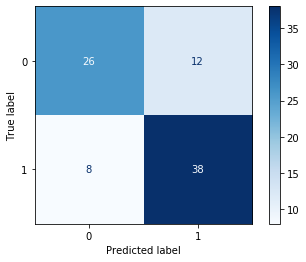

In [6]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues,normalize=None)
plt.show()

### Question: what is more important to us, minimizing false positives or false negatives?
### Therefore, which metric should we pay more attention to - precision or recall?

In [7]:
# Compute the accuracy, precision and recall for the target class ('1')
from sklearn.metrics import accuracy_score,recall_score,precision_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_test,test_preds)))
print('Recall: {:.3f}'.format(recall_score(y_test,test_preds)))
print('Precision: {:.3f}'.format(precision_score(y_test,test_preds)))

Accuracy: 0.762
Recall: 0.826
Precision: 0.760


In [8]:
# Alternatively, simply use sklearn's classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        38
           1       0.76      0.83      0.79        46

    accuracy                           0.76        84
   macro avg       0.76      0.76      0.76        84
weighted avg       0.76      0.76      0.76        84



### Adjusting threshold values
Now let's change the threshold value for classification of something as a mine ('1') and see how it impacts our metrics

In [8]:
test_preds_prob = model.predict_proba(X_test)

In [13]:
test_preds_prob1 = test_preds_prob[:,1]

# Use a threshold=0.1 to get discreet predictions from the probabilities
thresh = 0.1
test_preds_thresh = (test_preds_prob1>=thresh).astype(int)
test_preds_thresh

TypeError: only size-1 arrays can be converted to Python scalars

In [7]:
# Get the predicted probabilities of class "1"
test_preds_prob = model.predict_proba(X_test)
test_preds_prob1 = test_preds_prob[:,1]

# Use a threshold=0.1 to get discreet predictions from the probabilities
thresh = 0.1
test_preds_thresh = (test_preds_prob1>=thresh).astype(int)

# Calculate metrics
print('Accuracy: {:.3f}'.format(accuracy_score(y_test,test_preds_thresh)))
print('Recall: {:.3f}'.format(recall_score(y_test,test_preds_thresh)))
print('Precision: {:.3f}'.format(precision_score(y_test,test_preds_thresh)))

NameError: name 'accuracy_score' is not defined

In [10]:
# Use a threshold=0.9 to get discreet predictions from the probabilities
thresh = 0.9
test_preds_thresh = (test_preds_prob1>=thresh).astype(int)

# Calculate metrics
print('Accuracy: {:.3f}'.format(accuracy_score(y_test,test_preds_thresh)))
print('Recall: {:.3f}'.format(recall_score(y_test,test_preds_thresh)))
print('Precision: {:.3f}'.format(precision_score(y_test,test_preds_thresh)))

Accuracy: 0.810
Recall: 0.761
Precision: 0.875


### ROC Curve

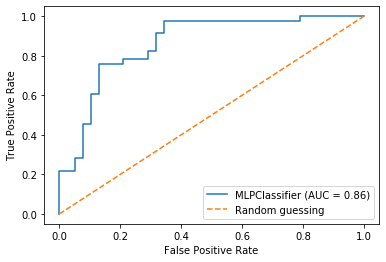

In [11]:
# Plot the ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,y_test)
# Add a line to show the curve for random guessing
plt.plot([0,1],[0,1],linestyle='--',label='Random guessing')
plt.legend()
plt.show()

### Precision-Recall Curve

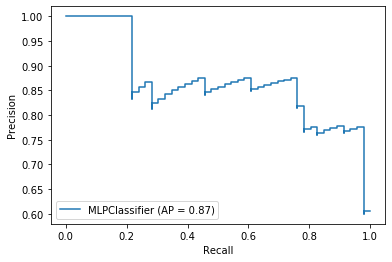

In [12]:
# Plot the precision-recall curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model,X_test,y_test)
plt.show()